In [ ]:
## For Google CoLab to set everything up
! git clone https://github.com/spetryk/ai4all2020.git
%cd ai4all2020/
%mkdir data

In [118]:
%matplotlib inline

# Functions for training neural network
from tools import *
from scans_utils import MRIDataset
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
import os


# Functions for visualizations
import torchvision
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [120]:
train_dataset = MRIDataset("data", train=True)
train_loader = DataLoader(train_dataset, batch_size=64)

val_dataset = MRIDataset("data", train=False)
val_loader = DataLoader(val_dataset, batch_size=64)

label: 1 (real)
label: 0 (fake)
label: 1 (real)


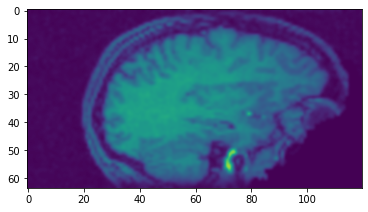

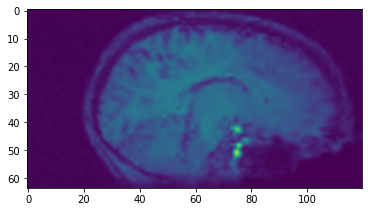

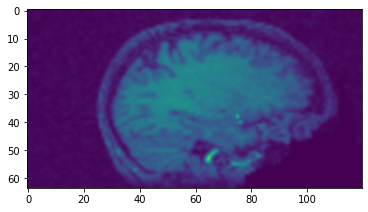

In [127]:
img, label = train_dataset[1]
print("label: {} ({})".format(label, "real" if label else "fake"))
plt.imshow(img, interpolation="bicubic")

img, label = train_dataset[7]
print("label: {} ({})".format(label, "real" if label else "fake"))
plt.figure()
plt.imshow(img, interpolation="bicubic")

i = [807, 816, 875, 1027, 1073][0]
img, label = val_dataset[594]
print("label: {} ({})".format(label, "real" if label else "fake"))
plt.figure()
plt.imshow(img, interpolation="bicubic")

In [128]:
image_shape = (120, 64)
model = nn.Sequential(nn.Flatten(), nn.Linear(image_shape[0] * image_shape[1], 1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [129]:
def evaluate(model, val_loader):
    n_correct = 0
    n_images = 0
    losses = []
    for images, labels in val_loader:
        predictions = model(images)
        loss = criterion(predictions, labels.float()).item()
        losses.append(loss)
        n_correct += (torch.round(predictions.view(-1)) == labels).sum().item()
        n_images += labels.numel()
    print("Average Loss:", np.mean(losses))
    print("Accuracy: {:3.2f}%".format(n_correct / n_images * 100))

In [130]:
step = 0
for epoch in range(3):
    for images, labels in train_loader:
        optimizer.zero_grad()
        predictions = model(images)
        loss = criterion(predictions, labels.float())
        loss.backward()
        if step % 100 == 0:
            print("loss:", loss.item())
        optimizer.step()
        step += 1
    evaluate(model, val_loader)

loss: 0.6932880282402039
loss: 0.5228344798088074
Average Loss: 0.49869720451533794
Accuracy: 79.04%
loss: 0.43881404399871826
Average Loss: 0.3967642495408654
Accuracy: 88.49%
loss: 0.35194557905197144
Average Loss: 0.33342968951910734
Accuracy: 92.55%


In [135]:
softmax = nn.Softmax()
num_wrong = 0
for i in range(len(val_dataset)):
    img, label = val_dataset[i]
    prediction = model(img.unsqueeze(0)).item()
    if round(prediction) != label and label == 1:
        num_wrong += 1
        print("i", i)
        print("label:", label)
        print("prediction:", prediction)
print(num_wrong, len(val_dataset))
torch.save(model.state_dict(), "trained_linear_model.pt")

i 5
label: 1
prediction: 0.46168115735054016
i 8
label: 1
prediction: 0.4470563232898712
i 60
label: 1
prediction: 0.45303040742874146
i 66
label: 1
prediction: 0.45342135429382324
i 77
label: 1
prediction: 0.4579698443412781
i 150
label: 1
prediction: 0.46731024980545044
i 152
label: 1
prediction: 0.45408567786216736
i 154
label: 1
prediction: 0.45216014981269836
i 158
label: 1
prediction: 0.4738677740097046
i 182
label: 1
prediction: 0.4616287648677826
i 198
label: 1
prediction: 0.44946181774139404
i 208
label: 1
prediction: 0.45616742968559265
i 257
label: 1
prediction: 0.4665028750896454
i 292
label: 1
prediction: 0.4780731499195099
i 390
label: 1
prediction: 0.45850732922554016
i 440
label: 1
prediction: 0.4546457529067993
i 484
label: 1
prediction: 0.4567683935165405
i 498
label: 1
prediction: 0.4490300714969635
i 562
label: 1
prediction: 0.44982966780662537
i 594
label: 1
prediction: 0.44913098216056824
i 598
label: 1
prediction: 0.44946587085723877
i 605
label: 1
prediction: 0.